### To understand the influence of the parents background, test preparation etc on students performance


In [260]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [261]:
df= pd.read_csv('StudentsPerformance 2.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [262]:
print('shape of data:', df.shape)
print('no.of students in the given data:', df.shape[0])
print('-'*90)
print('checking for null values')
print(df.isnull().sum().any())
print('-'*90)
print('Unique values in each feature:', '\n',df.nunique())
print('-'*90)
print(df.info())
print('-'*90)
print('Quick analysis of marks: \n', df.describe())
print('-'*90)

shape of data: (1000, 8)
no.of students in the given data: 1000
------------------------------------------------------------------------------------------
checking for null values
False
------------------------------------------------------------------------------------------
Unique values in each feature: 
 gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64
------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000

count of male and female students:
 gender
female    518
male      482
Name: gender, dtype: int64


/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


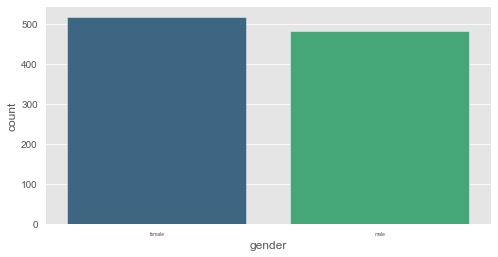

In [263]:
sns.countplot(df['gender'], palette='viridis')
print('count of male and female students:\n', df.groupby('gender')['gender'].count())

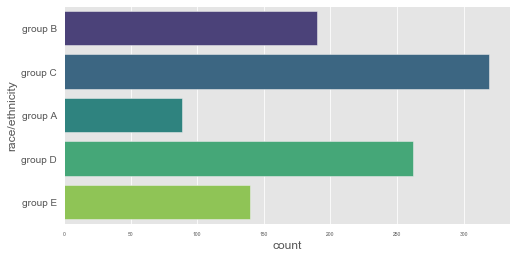

In [264]:
sns.countplot(y=df['race/ethnicity'], palette='viridis')

#### Group C has majority while group A has minority

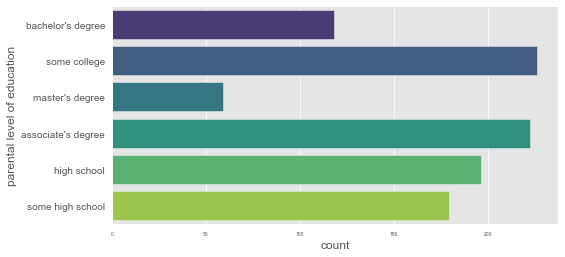

In [265]:
sns.countplot(y=df['parental level of education'], palette='viridis')

#### Most of the student's parents has assoc.degree or went to. college while few has master's or bachelor's degree

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


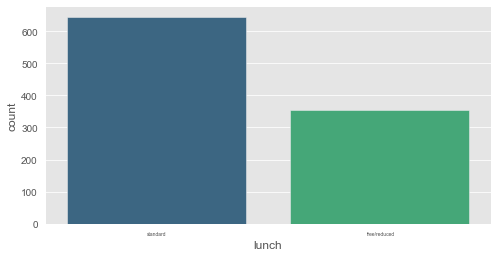

In [266]:
sns.countplot(df['lunch'], palette='viridis')

/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


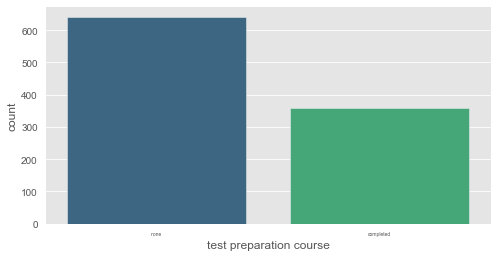

In [267]:
sns.countplot(df['test preparation course'], palette='viridis')

#### Most of the students didn't prepare for test

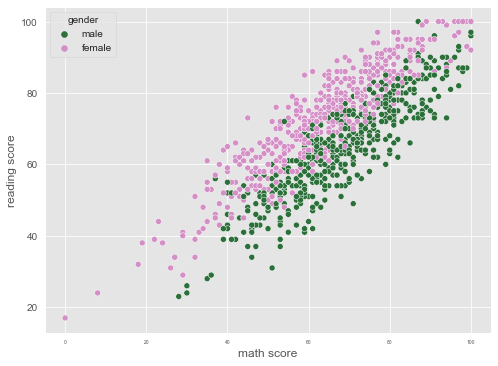

In [268]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='math score', y='reading score', hue='gender',palette='cubehelix', hue_order=['male', 'female'])

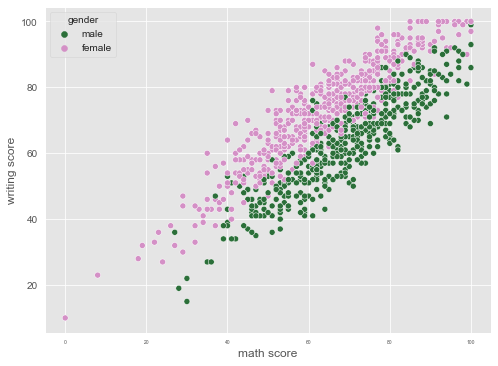

In [269]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df,x='math score', y='writing score', hue='gender',palette='cubehelix', hue_order=['male', 'female'])

In [270]:
pd.pivot_table(df, index='gender', values=['math score','writing score','reading score'])

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


#### Maths score has a linear relationship with reading and writing score. Means, students who are good in maths are also good in reading and writing. And also comparing to female, male scores more in maths

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [272]:
df['total percentage']=((df['math score'] + df['reading score'] + df['writing score'])/300)*100 
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


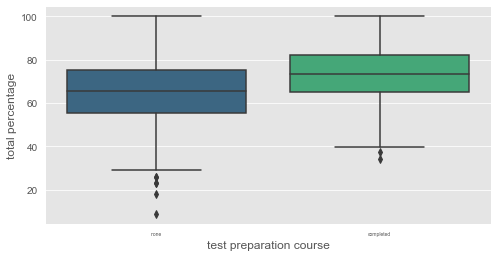

In [273]:
sns.boxplot(data=df, x='test preparation course', y='total percentage', palette='viridis')

#### Students who completed test preparation tend to have more % when compared to students who don't

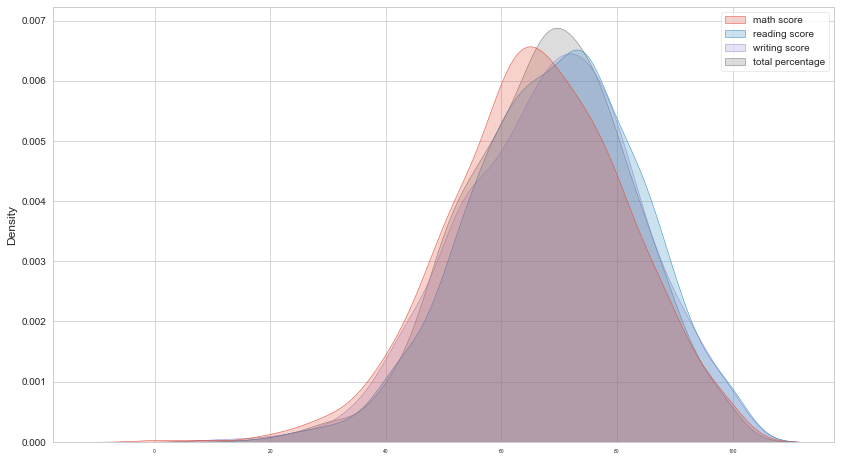

In [274]:
plt.figure(figsize=(14,8))
sns.set_style('whitegrid')
sns.kdeplot(data=df, shade=True)

#### Majority of students secured around 60 to 80 % score

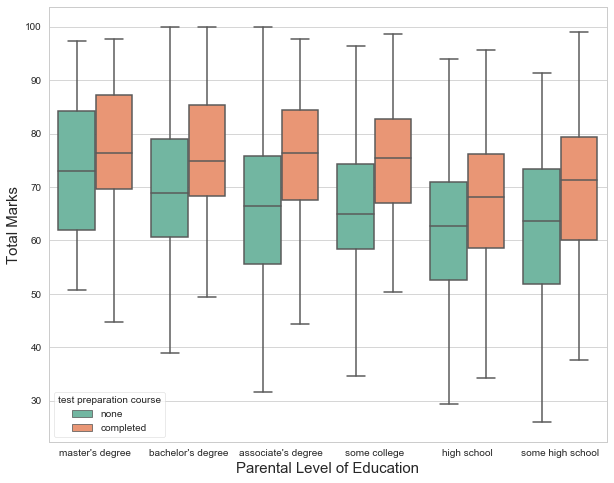

In [275]:
plt.figure(figsize=(10,8))
plt.rcParams["xtick.labelsize"] = 5
order = ["master's degree","bachelor's degree","associate's degree","some college","high school","some high school"]
sns.boxplot(data=df, x='parental level of education', y='total percentage', 
            palette='Set2', hue='test preparation course', order=order,showfliers= False )
plt.xlabel("Parental Level of Education", fontsize=15)
plt.ylabel("Total Marks",fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Parental education has effect on student's test preparation

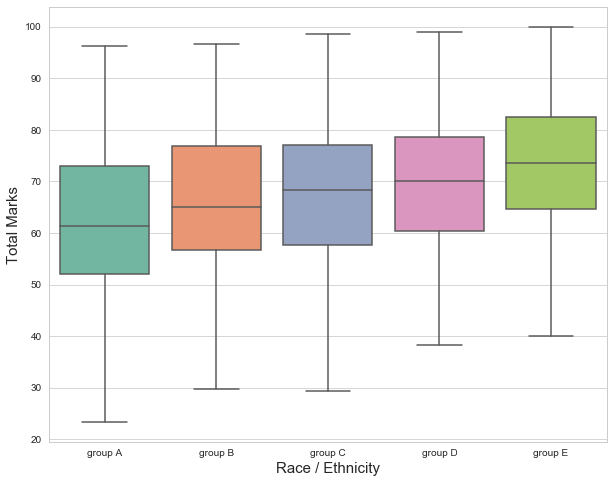

In [276]:
plt.figure(figsize=(10,8))
order=['group A','group B','group C','group D','group E']
sns.boxplot(data=df, x='race/ethnicity', y='total percentage', order=order, showfliers=False, palette='Set2')
plt.xlabel("Race / Ethnicity", fontsize=15)
plt.ylabel("Total Marks",fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#### Group E secures more percentage while group A tends to less

                  math score  reading score  writing score  total percentage
math score          1.000000       0.817580       0.802642          0.918746
reading score       0.817580       1.000000       0.954598          0.970331
writing score       0.802642       0.954598       1.000000          0.965667
total percentage    0.918746       0.970331       0.965667          1.000000
---------------------------------------------------------------------------------------------------


(4.0, 0.0)

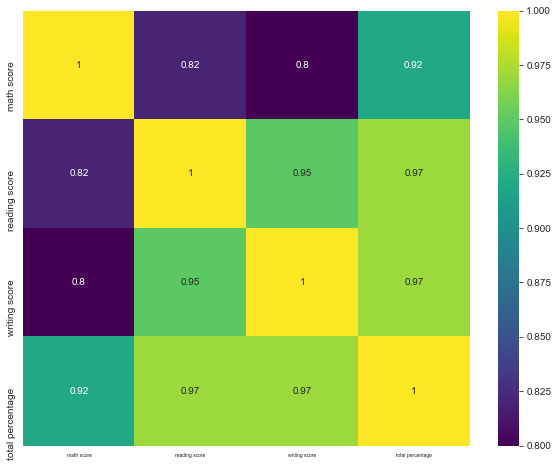

In [277]:
print(df.corr())
print('-'*99)
plt.figure(figsize=(10,8))
ax= sns.heatmap(df.corr().round(2), annot=True, cmap='viridis')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [278]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
def calculate_vif(x):
    vif_data= pd.DataFrame()
    vif_data['features']= x.columns
    vif_data['vif']= [vif(x.values, i) for i in range(x.shape[1])]
    vif_data['vif']=vif_data['vif'].round(2)
    vif_data=vif_data.sort_values(by='vif', ascending=False)
    return vif_data
calculate_vif(X_dummies)

,features,vif
0,race/ethnicity,3.17
8,lunch_standard,2.43
2,gender_male,1.80
6,parental level of education_some college,1.61
1,test preparation course,1.50
4,parental level of education_high school,1.47
7,parental level of education_some high school,1.46
3,parental level of education_bachelor's degree,1.30
5,parental level of education_master's degree,1.16


In [281]:
X=df.drop(['total percentage','math score', 'writing score', 'reading score'], axis=1)
y= df['total percentage']

In [282]:
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [283]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
replace_map= {'test preparation course':{'none':0, 'completed':1}}
X.replace(replace_map, inplace=True)
X

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,0
1,female,group C,some college,standard,1
2,female,group B,master's degree,standard,0
3,male,group A,associate's degree,free/reduced,0
4,male,group C,some college,standard,0
...,...,...,...,...,...
995,female,group E,master's degree,standard,1
996,male,group C,high school,free/reduced,0
997,female,group C,high school,free/reduced,1
998,female,group D,some college,standard,1


In [284]:
X_dummies= pd.get_dummies(X, drop_first=True)

In [285]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler().fit(X_dummies)
X_norm= norm.transform(X_dummies)
X_norm= pd.DataFrame(X_norm, columns=X_dummies.columns)
X_norm

,test preparation course,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
996,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
998,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [286]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_norm, y, test_size=0.2) 

In [301]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
tree= DecisionTreeRegressor
rf= RandomForestRegressor()
lr= LinearRegression()
lasso= Lasso()
ridge= Ridge()
elasctic=ElasticNet()

In [303]:
from sklearn.model_selection import cross_val_score
score= cross_val_score(estimator=rf, X=X_norm,y=y, cv=8)
score

array([ 0.10706757, -0.09701396,  0.1185327 , -0.07332061,  0.05150948,
       -0.08900449, -0.11595077,  0.06590829])

In [304]:
score.mean()

-0.004033972623458226

In [291]:
score.std().round()

0.0

### Feature Importance

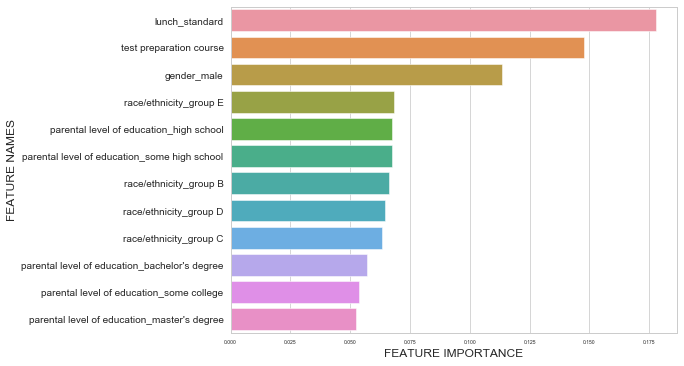

In [292]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_dummies,y)
feature_importance = np.array(model.feature_importances_)
feature_names = np.array(X_dummies.columns)
data={'feature_names':feature_names,'feature_importance':feature_importance}
df_plt = pd.DataFrame(data)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)
plt.figure(figsize=(8,6))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
plt.style.use("ggplot")
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')
plt.show()